In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [28]:
covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
covid_cases_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [29]:
covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
covid_deaths_df=pd.DataFrame(covid_deaths_data)
covid_deaths_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


Linear Regression RMSE: 1596074.3607497062
Polynomial Regression RMSE (degree=5): 101158.57363253536


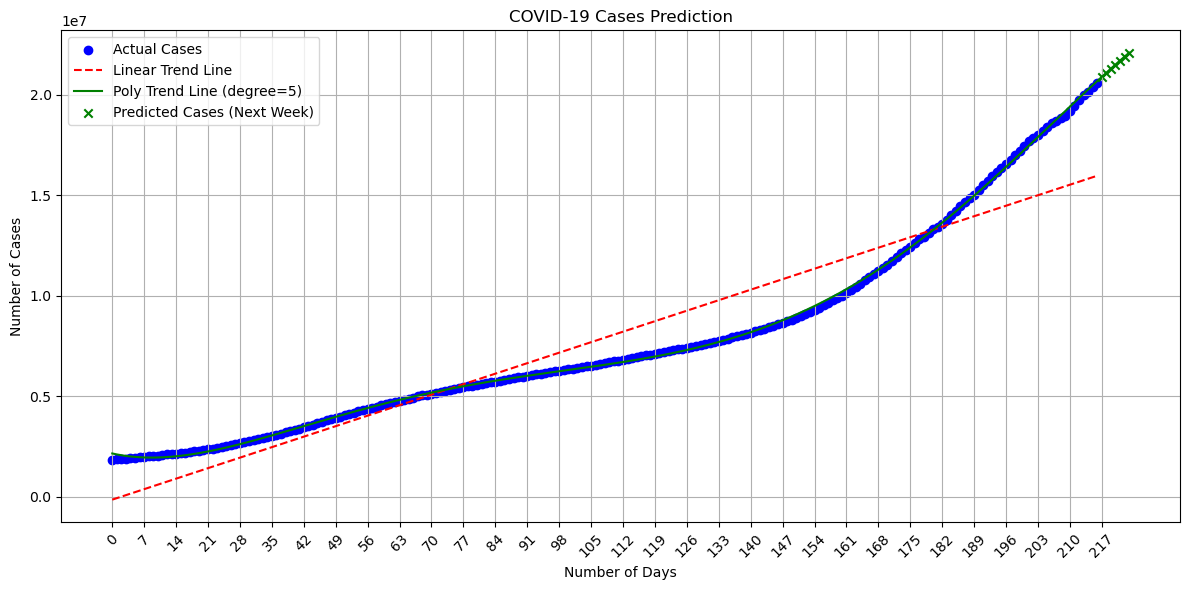

In [36]:

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 5  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE: 13545.924691430659
Polynomial Regression RMSE (degree=3): 4762.935748761431


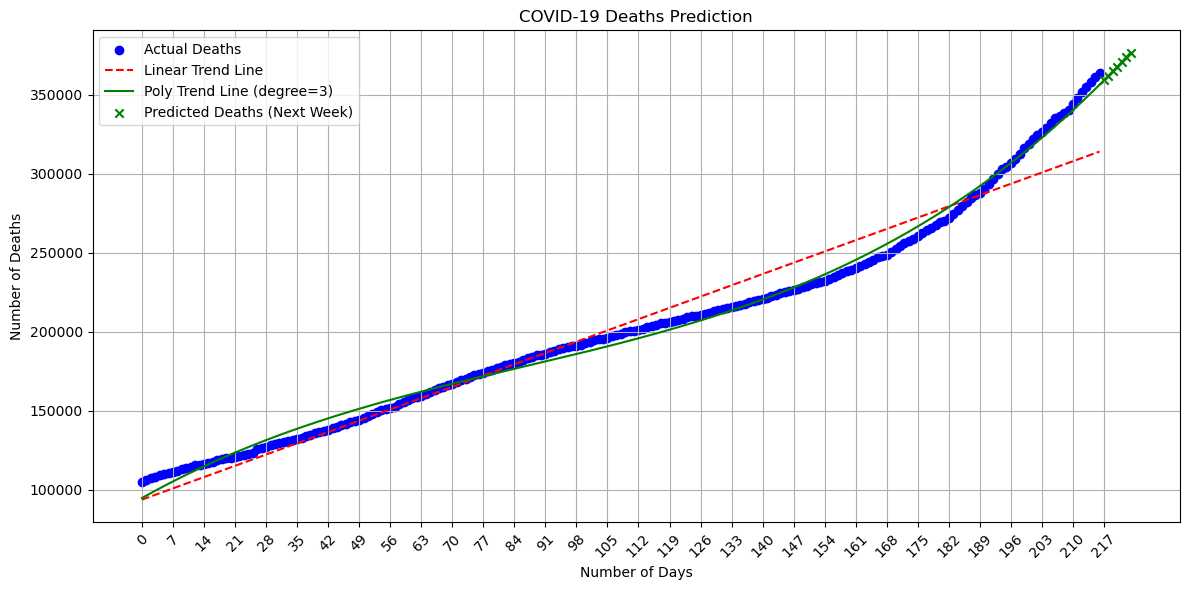

In [37]:

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

In [51]:
other_cases_data = pd.read_csv('total_cases.csv')
other_deaths_data = pd.read_csv('total_deaths.csv')

In [52]:
other_cases_data.head()

,date,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Assuming 'UK' is the column name for the United Kingdom's data
uk_cases_data = other_cases_data['United Kingdom']
uk_deaths_data = other_deaths_data['United Kingdom']


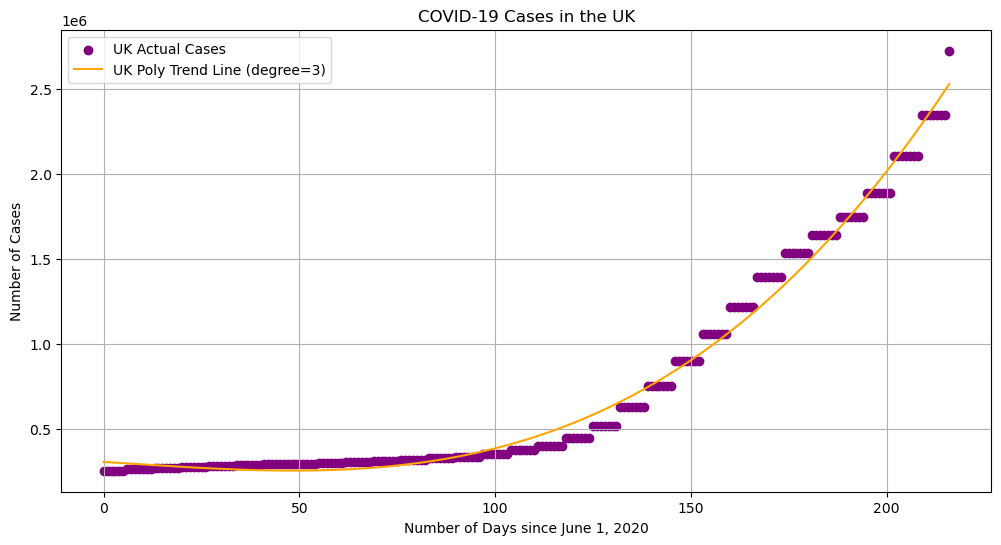

In [60]:
# Filter the UK data for the specified date range
uk_cases_data = other_cases_data['United Kingdom']
uk_deaths_data = other_deaths_data['United Kingdom']

# Convert index to datetime if necessary and filter by date range
other_cases_data['Date'] = pd.to_datetime(other_cases_data['date'])
uk_cases_data = uk_cases_data[(other_cases_data['Date'] >= '2020-06-01') & (other_cases_data['Date'] <= '2021-01-03')]
uk_deaths_data = uk_deaths_data[(other_cases_data['Date'] >= '2020-06-01') & (other_cases_data['Date'] <= '2021-01-03')]

# Assuming days_since_start is the array of days since 2020-06-01
days_since_start = np.arange(len(uk_cases_data))

# Fit the regression models (linear or polynomial as needed)
# Example with polynomial regression for cases
degree = 3
poly_features_uk = PolynomialFeatures(degree=degree)
X_poly_uk = poly_features_uk.fit_transform(days_since_start.reshape(-1, 1))
reg_poly_uk = LinearRegression().fit(X_poly_uk, uk_cases_data.values.reshape(-1, 1))

# Plotting the data for visual comparison
plt.figure(figsize=(12, 6))
plt.scatter(days_since_start, uk_cases_data, color='purple', label='UK Actual Cases')
X_plot_poly_uk = poly_features_uk.transform(np.arange(len(uk_cases_data)).reshape(-1, 1))
plt.plot(np.arange(len(uk_cases_data)), reg_poly_uk.predict(X_plot_poly_uk), color='orange', label=f'UK Poly Trend Line (degree={degree})')
plt.xlabel('Number of Days since June 1, 2020')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in the UK')
plt.legend()
plt.grid(True)
plt.show()

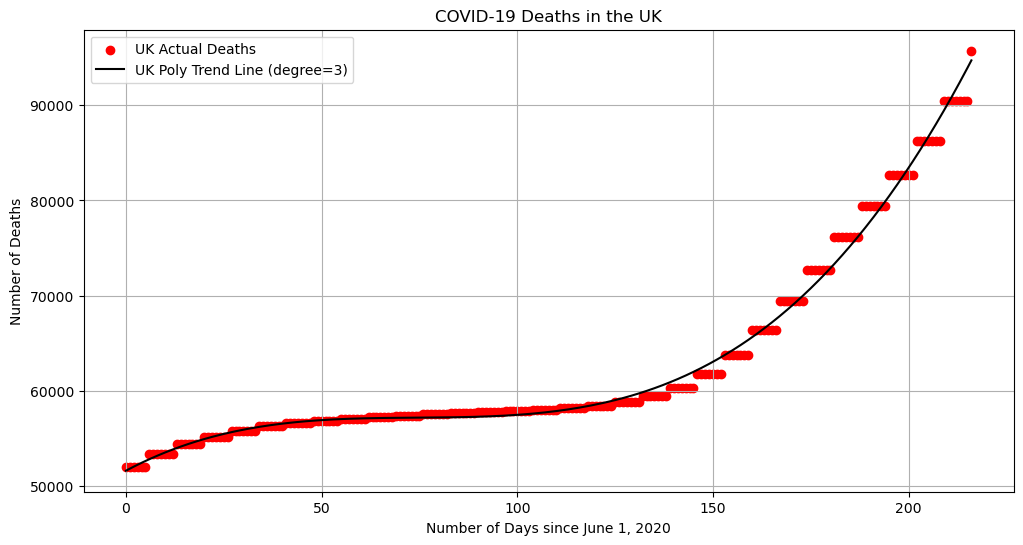

In [63]:
# Convert index to datetime if necessary and filter by date range
other_deaths_data['Date'] = pd.to_datetime(other_deaths_data['date'])  # Ensure the 'date' column is correct
uk_deaths_data = uk_deaths_data[(other_deaths_data['Date'] >= '2020-06-01') & (other_deaths_data['Date'] <= '2021-01-03')]

# Prepare the days_since_start based on the filtered data
days_since_start_deaths = np.arange(len(uk_deaths_data))

# Fit the regression models (linear or polynomial as needed)
# Using polynomial regression for deaths as an example
degree_deaths = 3
poly_features_uk_deaths = PolynomialFeatures(degree=degree_deaths)
X_poly_uk_deaths = poly_features_uk_deaths.fit_transform(days_since_start_deaths.reshape(-1, 1))
reg_poly_uk_deaths = LinearRegression().fit(X_poly_uk_deaths, uk_deaths_data.values.reshape(-1, 1))

# Plotting the deaths data for visual comparison
plt.figure(figsize=(12, 6))
plt.scatter(days_since_start_deaths, uk_deaths_data, color='red', label='UK Actual Deaths')
X_plot_poly_uk_deaths = poly_features_uk_deaths.transform(np.arange(len(uk_deaths_data)).reshape(-1, 1))
plt.plot(np.arange(len(uk_deaths_data)), reg_poly_uk_deaths.predict(X_plot_poly_uk_deaths), color='black', label=f'UK Poly Trend Line (degree={degree_deaths})')
plt.xlabel('Number of Days since June 1, 2020')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths in the UK')
plt.legend()
plt.grid(True)
plt.show()